In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

In [3]:
!unzip "/content/drive/MyDrive/AIP_A4_q3/object_detection.zip"

Streaming output truncated to the last 5000 lines.
  inflating: object_detection/test/labels/1065.txt  
  inflating: __MACOSX/object_detection/test/labels/._1065.txt  
  inflating: object_detection/test/labels/1071.txt  
  inflating: __MACOSX/object_detection/test/labels/._1071.txt  
  inflating: object_detection/test/labels/888.txt  
  inflating: __MACOSX/object_detection/test/labels/._888.txt  
  inflating: object_detection/test/labels/1111.txt  
  inflating: __MACOSX/object_detection/test/labels/._1111.txt  
  inflating: object_detection/test/labels/1138.txt  
  inflating: __MACOSX/object_detection/test/labels/._1138.txt  
  inflating: object_detection/test/labels/1104.txt  
  inflating: __MACOSX/object_detection/test/labels/._1104.txt  
  inflating: object_detection/test/labels/1058.txt  
  inflating: __MACOSX/object_detection/test/labels/._1058.txt  
  inflating: object_detection/test/labels/1048.txt  
  inflating: __MACOSX/object_detection/test/labels/._1048.txt  
  inflating: ob

In [4]:
!mv /content/object_detection /content/data

In [5]:
!mv /content/data/val /content/data/valid

In [6]:
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git
%cd yolov5/
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15393, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 15393 (delta 9), reused 17 (delta 6), pack-reused 15369
Receiving objects: 100% (15393/15393), 14.37 MiB | 14.03 MiB/s, done.
Resolving deltas: 100% (10522/10522), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00


In [7]:
print(os.getcwd())

/content/yolov5


In [8]:
import torch
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.0+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


###Train

In [9]:
# Train YOLOv5s on object detection for 1000 epochs
!python train.py --img 640 --batch 16 --epochs 1000 --data /content/data/data.yaml --weights '' --cfg yolov5s.yaml --cache ram

train: weights=, cfg=yolov5s.yaml, data=/content/data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1000, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.

In [10]:
%cp /content/yolov5/runs/train/exp/weights/best.pt /content/drive/MyDrive

### Test

In [11]:
!python val.py --img 640 --batch 16 --task 'test' --data /content/data/data.yaml --weights /content/yolov5/runs/train/exp/weights/best.pt

val: data=/content/data/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/data/test/labels... 104 images, 3 backgrounds, 0 corrupt: 100% 107/107 [00:00<00:00, 648.19it/s]
test: New cache created: /content/data/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:06<00:00,  1.06it/s]
                   all        107        550      0.322      0.255      0.211       0.11
                  door        107         34    

In [13]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/data/test/images/1003.png

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/data/test/images/1003.png, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/data/test/images/1003.png: 320x416 4 doors, 1 cabinetDoor, 39.8ms
Speed: 0.4ms pre-process, 39.8ms inference, 98.6ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp


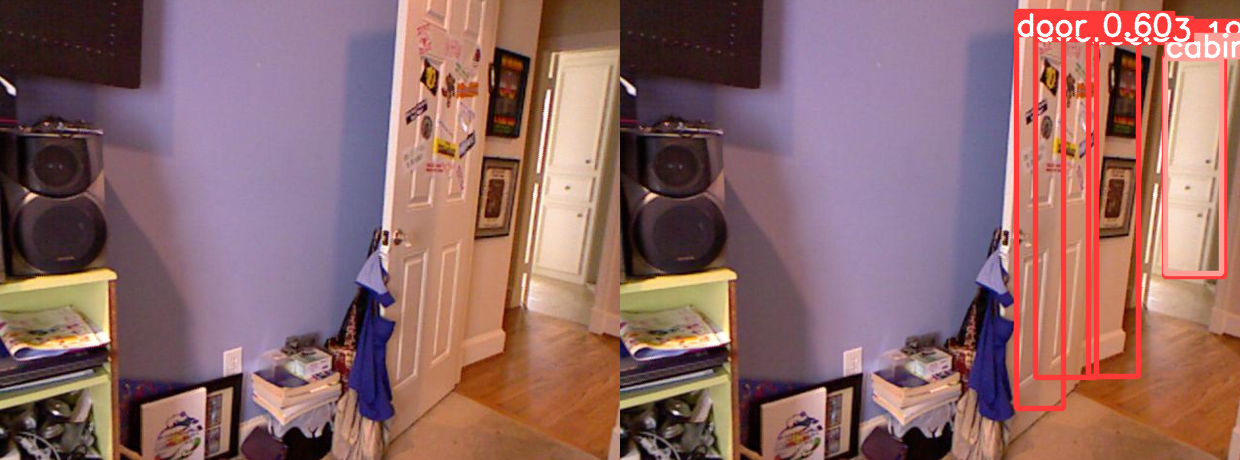

In [21]:
import cv2
import numpy as np

# Load the two images
img1 = cv2.imread('/content/data/test/images/1003.png')
img2 = cv2.imread('/content/yolov5/runs/detect/exp/1003.png')

# Resize the images to have the same height
height = max(img1.shape[0], img2.shape[0])
width1 = int(img1.shape[1] * (height / img1.shape[0]))
width2 = int(img2.shape[1] * (height / img2.shape[0]))
img1 = cv2.resize(img1, (width1, height))
img2 = cv2.resize(img2, (width2, height))

# Concatenate the two images horizontally
img_concat = np.concatenate((img1, img2), axis=1)

# Display the concatenated image using cv2_imshow
cv2_imshow(img_concat)


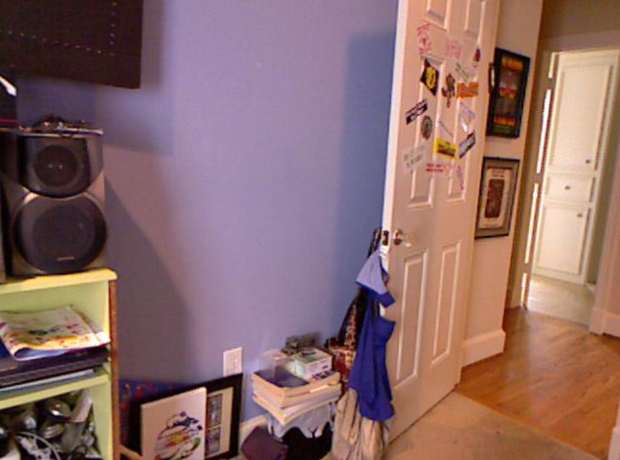

In [18]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/data/test/images/1003.png', cv2.IMREAD_UNCHANGED)

# Display the image
cv2_imshow(image)

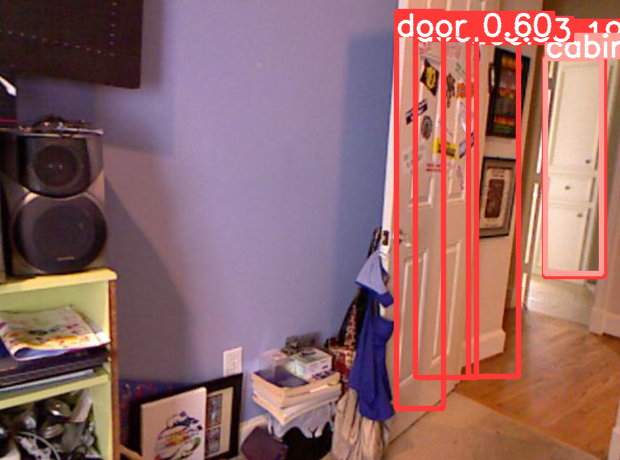

In [15]:
image = cv2.imread('/content/yolov5/runs/detect/exp/1003.png', cv2.IMREAD_UNCHANGED)

# Display the image
cv2_imshow(image)